In [1]:
from utils import GraphMaker

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

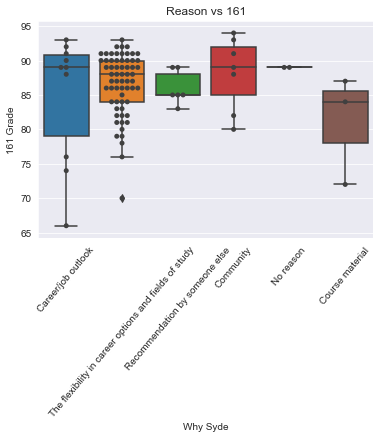

In [4]:
reason_v_161_data = GraphMaker(x='What was your MAIN reason for choosing SYDE?', y='What was your final grade for 161?', data=class_df,                                             x_label="Why Syde", y_label="161 Grade", title="Reason vs 161")

boxplot = reason_v_161_data.boxplot(rotation=50, show_points = True)

Done


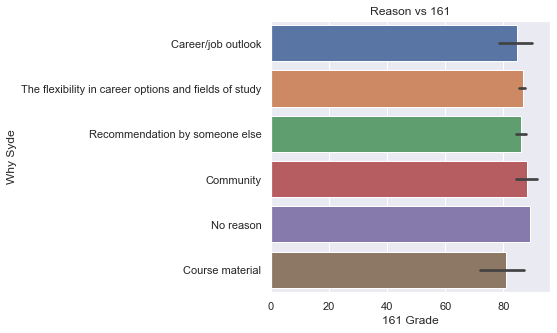

In [5]:
barplot = reason_v_161_data.barplot(figsize=(5, 5), orient='h')

In [6]:
col_name = 'What was your MAIN reason for choosing SYDE?'
reasons_161 = class_df.groupby(col_name)[col_name].count()
print(reasons_161)

What was your MAIN reason for choosing SYDE?
Career/job outlook                                       12
Community                                                 8
Course material                                           3
No reason                                                 2
Recommendation by someone else                            6
The flexibility in career options and fields of study    63
Name: What was your MAIN reason for choosing SYDE?, dtype: int64


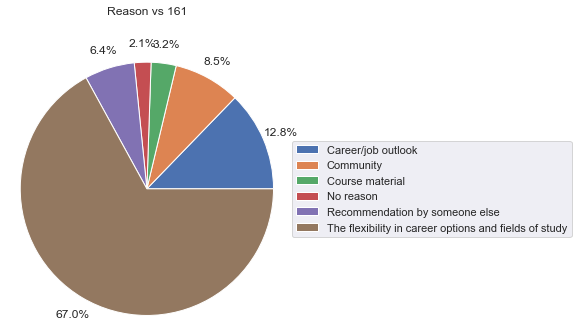

In [7]:
pie_chart = reason_v_161_data.pie(x=reasons_161.values, labels=reasons_161.index, figsize=(5, 5))

What was your MAIN reason for choosing SYDE? What was your final grade for 161?
Done


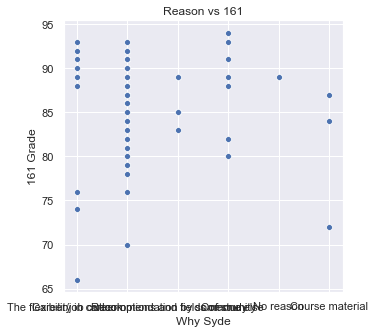

In [8]:
scatter_plot = reason_v_161_data.scatterplot()

In [9]:
cols = ['What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What is your salary (in CAD/h, do not include "$")?']

df = class_df[cols].rename(columns={'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ': "avg",
                                   'What is your salary (in CAD/h, do not include "$")?': 'salary'})
# remove all entries with no salary
df = df[df['salary'].notnull()]
# remove all entries with no avg
df = df[df['avg'].notnull()]

def clean_avg_and_salary(row):
    if row['avg'] % 1 >= 0.5:
        row['avg'] += 1
    row['avg'] = int(row['avg'])
    
    if row['salary'] > 30 or row['salary'] < 13:
        row['salary'] = None
    
    return row

df = df.apply(clean_avg_and_salary, axis=1).dropna()

avg salary
Done


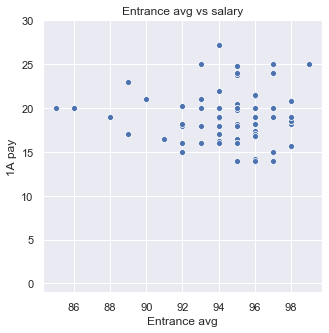

In [10]:
grade_v_pay = GraphMaker(x='avg', y='salary', data=df, title='Entrance avg vs salary', x_label='Entrance avg', y_label='1A pay')
scatter = grade_v_pay.scatterplot(ylim = (-1, 30))

Done


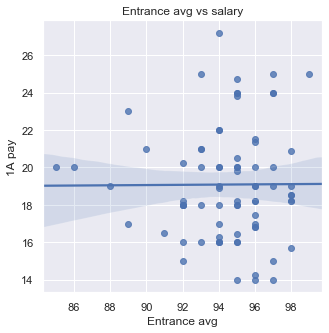

In [11]:
scatter_reg = grade_v_pay.scatterplot(reg_line=True)